In [1]:
# Imports

# Numpy,Pandas
import numpy as np
import pandas as pd
import datetime

# matplotlib,seaborn,pyecharts

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# plt.style.use('ggplot')  #风格设置近似R这种的ggplot库
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import missingno as msno

# import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


#  忽略弹出的warnings
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.float_format', lambda x: '%.4f' % x)

from imblearn.over_sampling import SMOTE
import itertools

In [2]:
import numpy as np
import pandas as pd
from sklearn import model_selection

df = pd.read_csv('C:\\Users\\FeiZhao\\Desktop\\practice05\\csv_train.csv', low_memory=False, header=0)
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.shape

(30000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0000,15000.5000,8660.3984,1.0000,7500.7500,15000.5000,22500.2500,30000.0000
LIMIT_BAL,30000.0000,167484.3227,129747.6616,10000.0000,50000.0000,140000.0000,240000.0000,1000000.0000
SEX,30000.0000,1.6037,0.4891,1.0000,1.0000,2.0000,2.0000,2.0000
EDUCATION,30000.0000,1.8531,0.7903,0.0000,1.0000,2.0000,2.0000,6.0000
MARRIAGE,30000.0000,1.5519,0.5220,0.0000,1.0000,2.0000,2.0000,3.0000
AGE,30000.0000,35.4855,9.2179,21.0000,28.0000,34.0000,41.0000,79.0000
PAY_0,30000.0000,-0.0167,1.1238,-2.0000,-1.0000,0.0000,0.0000,8.0000
PAY_2,30000.0000,-0.1338,1.1972,-2.0000,-1.0000,0.0000,0.0000,8.0000
PAY_3,30000.0000,-0.1662,1.1969,-2.0000,-1.0000,0.0000,0.0000,8.0000
PAY_4,30000.0000,-0.2207,1.1691,-2.0000,-1.0000,0.0000,0.0000,8.0000


In [6]:
df['PAY_0'] =df["PAY_0"].apply(lambda x: 1 if x > 0 else 0)
df['PAY_2'] =df["PAY_2"].apply(lambda x: 1 if x > 0 else 0)
df['PAY_3'] =df["PAY_3"].apply(lambda x: 1 if x > 0 else 0)
df['PAY_4'] =df["PAY_4"].apply(lambda x: 1 if x > 0 else 0)
df['PAY_5'] =df["PAY_5"].apply(lambda x: 1 if x > 0 else 0)
df['PAY_6'] =df["PAY_6"].apply(lambda x: 1 if x > 0 else 0)
df["MARRIAGE"] = df["MARRIAGE"].apply(lambda x: 3 if x == 0 else x)
df["EDUCATION"] = df["EDUCATION"].apply(lambda x: 4 if x == 0 else x)
df["EDUCATION"] = df["EDUCATION"].apply(lambda x: 4 if x == 5 else x)
df["EDUCATION"] = df["EDUCATION"].apply(lambda x: 4 if x == 6 else x)
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,1,1,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,1,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df["MARRIAGE"].unique()
df["EDUCATION"].unique()

array([2, 1, 3, 4], dtype=int64)

In [8]:
quantitative = ['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
qualitative = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default payment next month']

for c in quantitative:
    df[c] = df[c].astype('float')

for c in qualitative:
    df[c] = df[c].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 no

In [9]:
#data profile using pandas
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,25
Number of observations,30000
Total Missing (%),0.0%
Total size in memory,3.7 MiB
Average record size in memory,130.0 B
Numeric,10
Categorical,10
Date,0
Text (Unique),0
Rejected,5
Distinct count,56


In [10]:
df.shape

(30000, 25)

In [11]:
df.dtypes

ID                               int64
LIMIT_BAL                      float64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                         category
PAY_2                         category
PAY_3                         category
PAY_4                         category
PAY_5                         category
PAY_6                         category
BILL_AMT1                      float64
BILL_AMT2                      float64
BILL_AMT3                      float64
BILL_AMT4                      float64
BILL_AMT5                      float64
BILL_AMT6                      float64
PAY_AMT1                       float64
PAY_AMT2                       float64
PAY_AMT3                       float64
PAY_AMT4                       float64
PAY_AMT5                       float64
PAY_AMT6                       float64
default payment next month    category
dtype: object

In [12]:
df.info() # 查看数据的基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 no

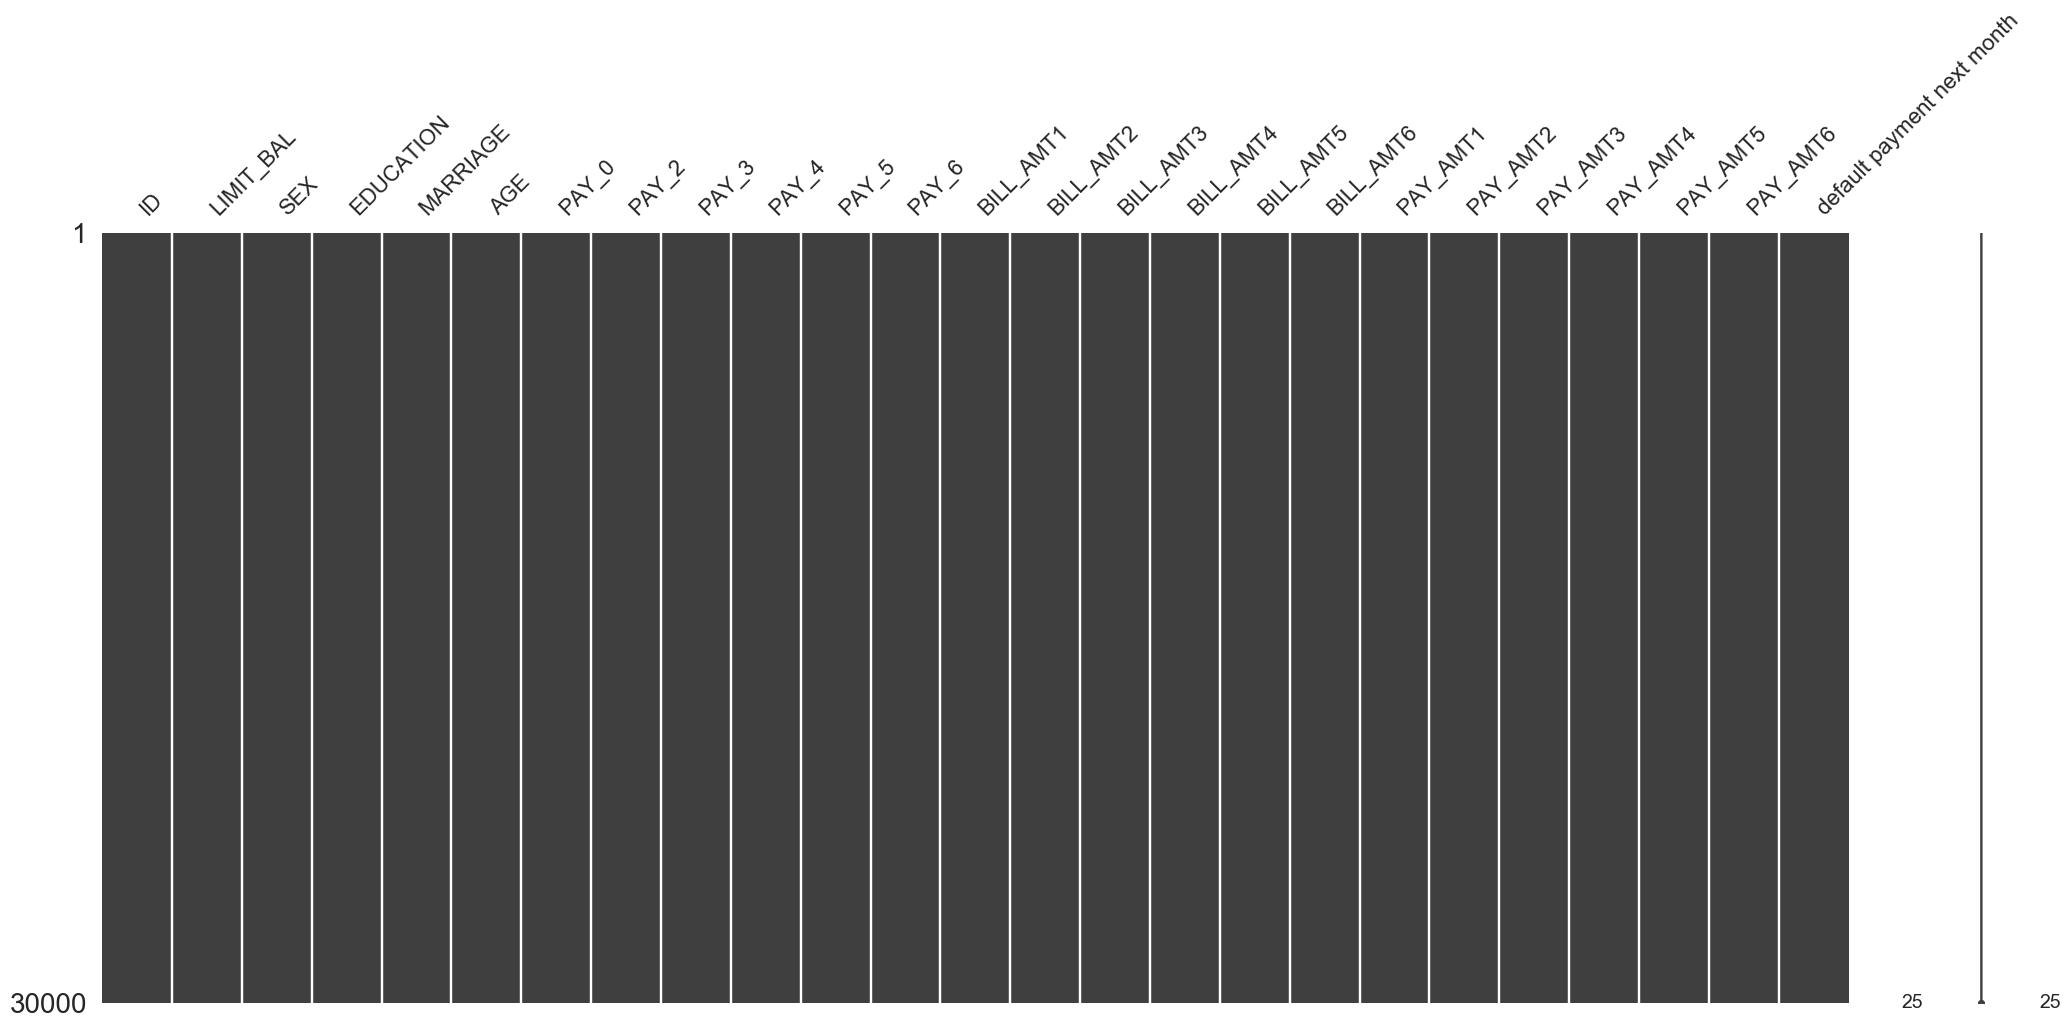

In [13]:
msno.matrix(df) # 查看缺失值情况

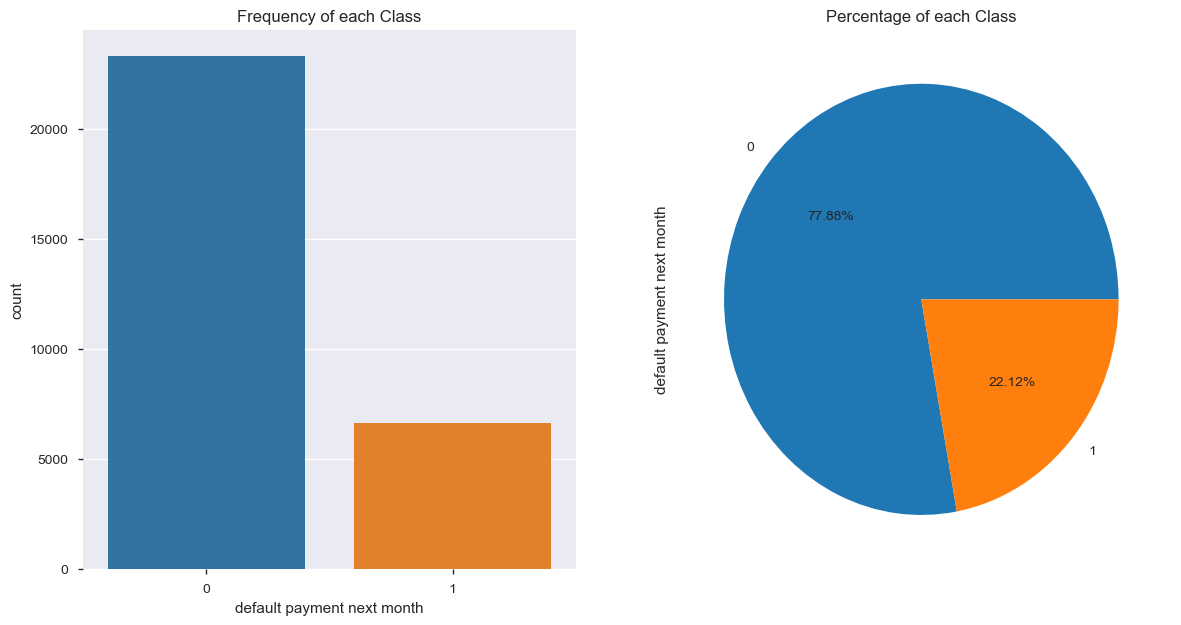

In [14]:
# 目标变量分布可视化
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='default payment next month',data=df,ax=axs[0])
axs[0].set_title("Frequency of each Class")
df['default payment next month'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Class")
plt.show()

In [15]:
# 查看目标列的情况
df.groupby('default payment next month').size()

default payment next month
0    23364
1     6636
dtype: int64

In [16]:
df[quantitative].corr()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.0000,0.2854,0.2783,0.2832,0.2940,0.2956,0.2904,0.1952,0.1784,0.2102,0.2032,0.2172,0.2196
BILL_AMT1,0.2854,1.0000,0.9515,0.8923,0.8603,0.8298,0.8027,0.1403,0.0994,0.1569,0.1583,0.1670,0.1793
BILL_AMT2,0.2783,0.9515,1.0000,0.9283,0.8925,0.8598,0.8316,0.2804,0.1009,0.1507,0.1474,0.1580,0.1743
BILL_AMT3,0.2832,0.8923,0.9283,1.0000,0.9240,0.8839,0.8533,0.2443,0.3169,0.1300,0.1434,0.1797,0.1823
BILL_AMT4,0.2940,0.8603,0.8925,0.9240,1.0000,0.9401,0.9009,0.2330,0.2076,0.3000,0.1302,0.1604,0.1776
BILL_AMT5,0.2956,0.8298,0.8598,0.8839,0.9401,1.0000,0.9462,0.2170,0.1812,0.2523,0.2931,0.1416,0.1642
BILL_AMT6,0.2904,0.8027,0.8316,0.8533,0.9009,0.9462,1.0000,0.2000,0.1727,0.2338,0.2502,0.3077,0.1155
PAY_AMT1,0.1952,0.1403,0.2804,0.2443,0.2330,0.2170,0.2000,1.0000,0.2856,0.2522,0.1996,0.1485,0.1857
PAY_AMT2,0.1784,0.0994,0.1009,0.3169,0.2076,0.1812,0.1727,0.2856,1.0000,0.2448,0.1801,0.1809,0.1576
PAY_AMT3,0.2102,0.1569,0.1507,0.1300,0.3000,0.2523,0.2338,0.2522,0.2448,1.0000,0.2163,0.1592,0.1627


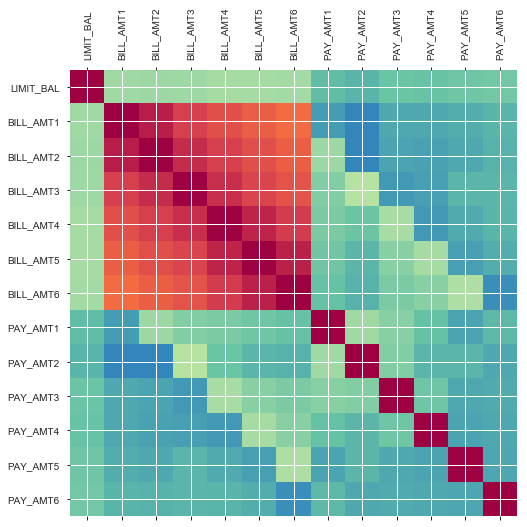

In [17]:
#correlation matrix plot using pandas
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
import matplotlib.cm as cm
rcParams['figure.figsize'] = 10, 8
plt.matshow(df[quantitative].corr(), cmap=cm.Spectral_r, interpolation='none', vmin=0, vmax=1)
plt.xticks(range(len(df[quantitative].columns)),df[quantitative].corr().columns.values, rotation=90)
plt.yticks(range(len(df[quantitative].columns)),df[quantitative].corr().columns.values)
plt.show()

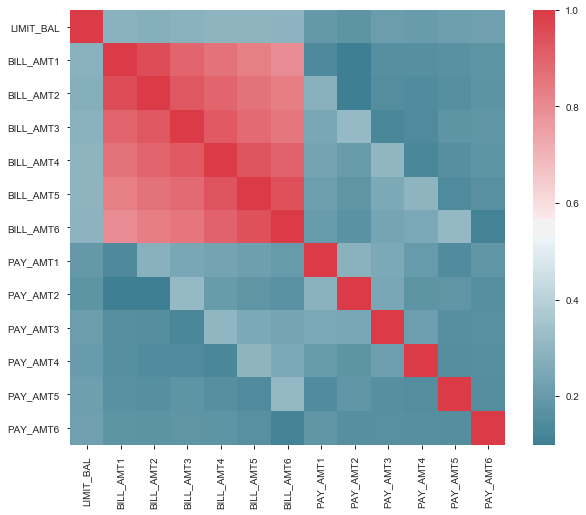

In [18]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = df[quantitative].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

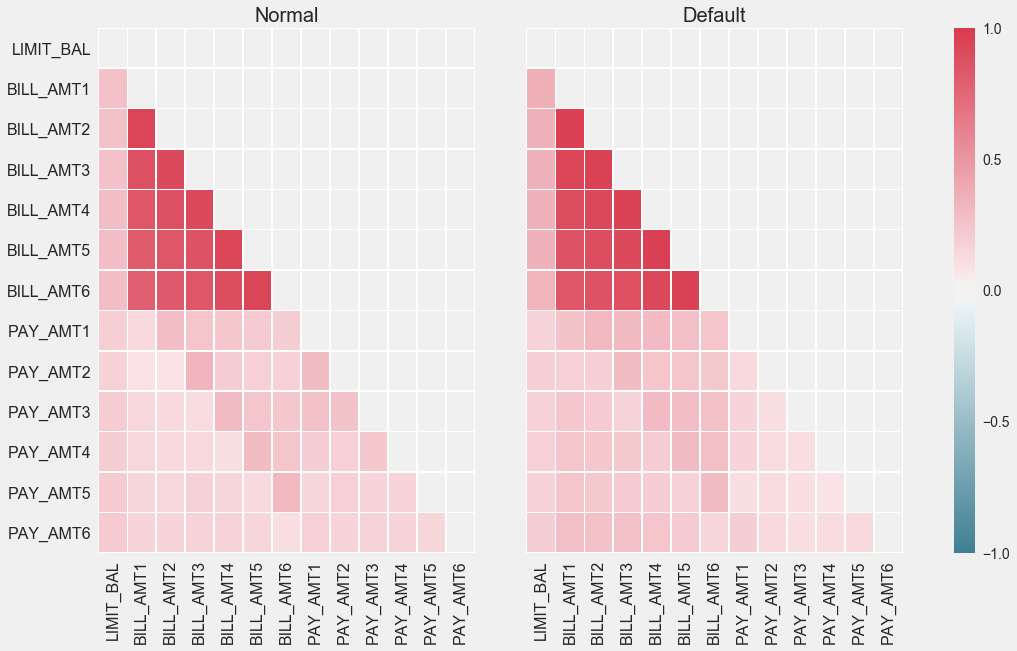

In [68]:
#查看信用卡正常用户与被盗刷用户之间的区别
Xfraud = df[quantitative].loc[df["default payment next month"] == 1] # update Xfraud & XnonFraud with cleaned data
XnonFraud = df[quantitative].loc[df["default payment next month"] == 0]
                  
correlationNonFraud = XnonFraud.loc[:, df[quantitative].columns != 'default payment next month'].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Normal', size = 20)

correlationFraud = Xfraud.loc[:, df[quantitative].columns != 'default payment next month'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Default', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

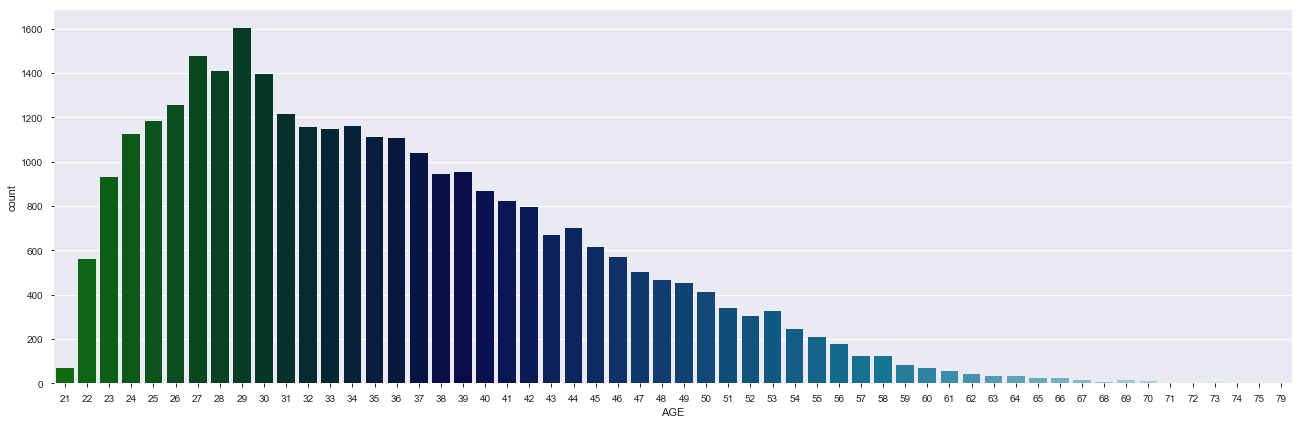

In [20]:
#样本年龄
sns.factorplot(x="AGE", data=df, kind="count",  palette="ocean", size=6, aspect=3)

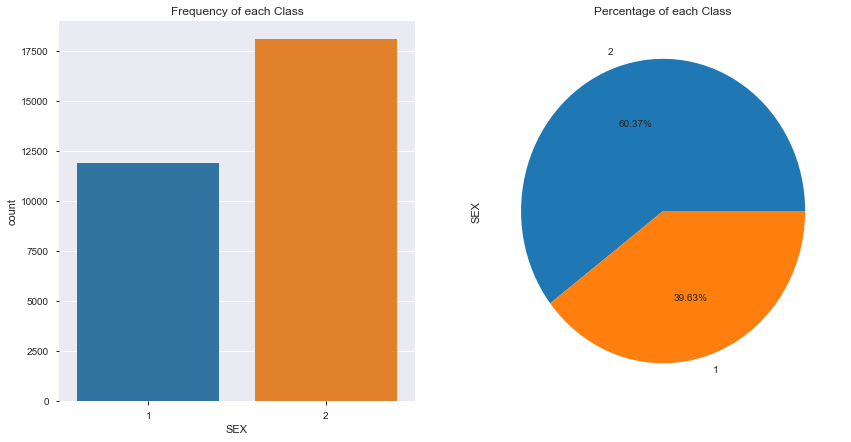

In [21]:
#样本性别分布可视化
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='SEX',data=df,ax=axs[0])
axs[0].set_title("Frequency of each Class")
df['SEX'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Class")
plt.show()

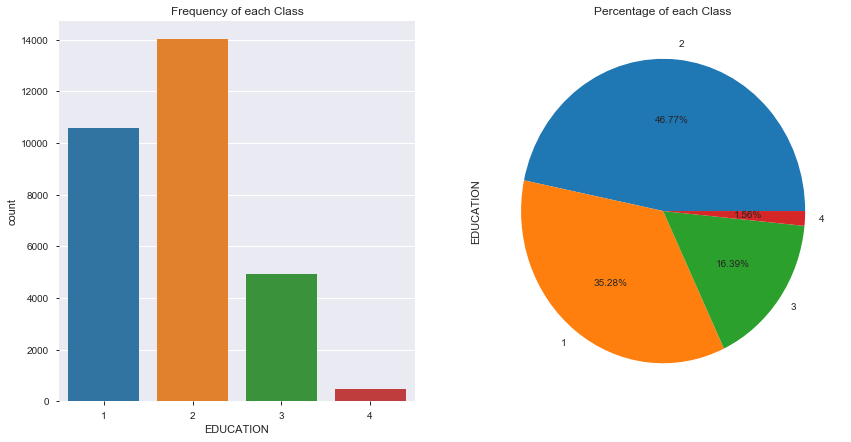

In [23]:
#样本教育程度分布可视化
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='EDUCATION',data=df,ax=axs[0])
axs[0].set_title("Frequency of each Class")
df['EDUCATION'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Class")
plt.show()

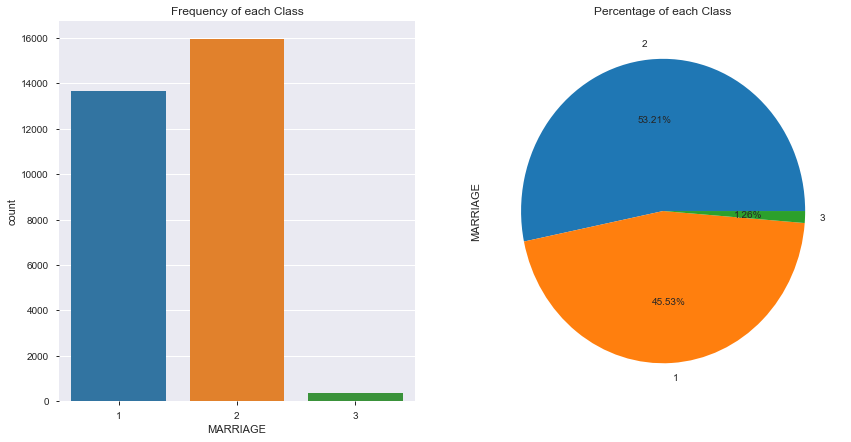

In [24]:
#样本教育程度分布可视化
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='MARRIAGE',data=df,ax=axs[0])
axs[0].set_title("Frequency of each Class")
df['MARRIAGE'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Class")
plt.show()

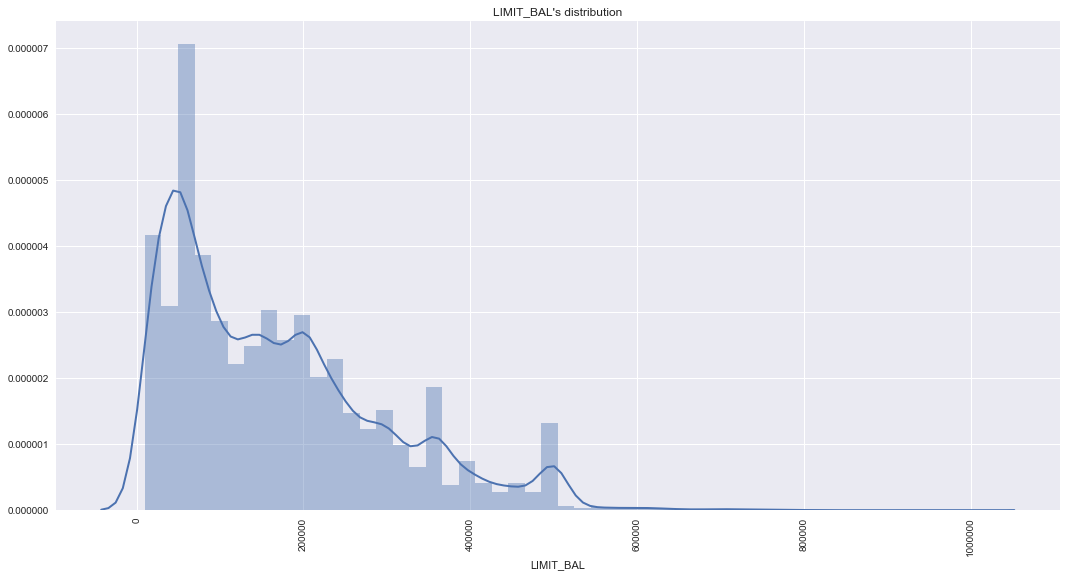

In [25]:
#总授信额度可视化
plt.figure(figsize=(18, 9))
sns.set()
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth":2 } )
sdisplot_loan = sns.distplot(df['LIMIT_BAL'] )
plt.xticks(rotation=90)
plt.xlabel('LIMIT_BAL')
plt.title('LIMIT_BAL\'s distribution')
sdisplot_loan.figure.savefig("LIMIT_BAL")

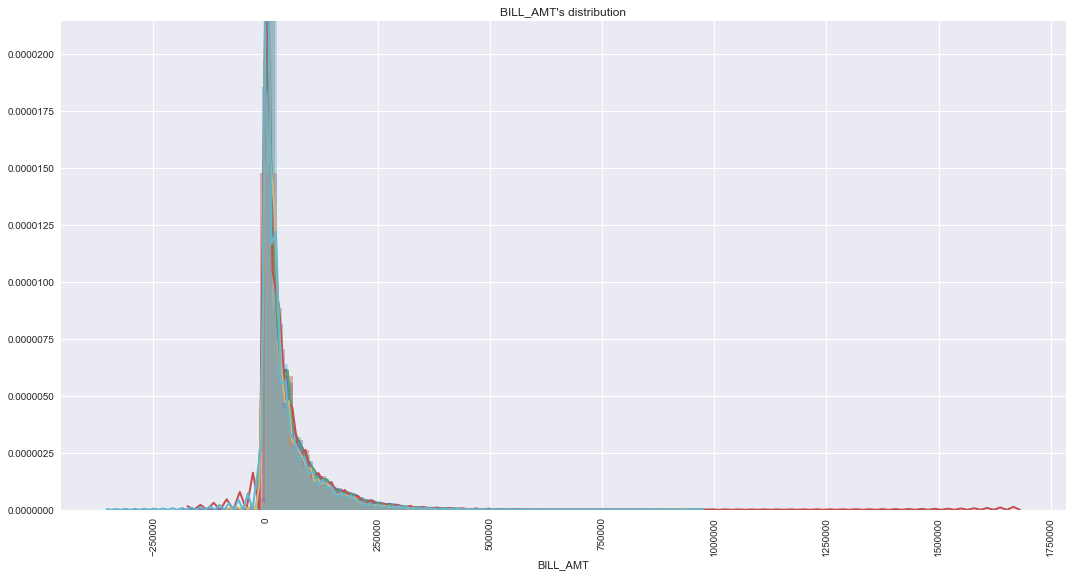

In [26]:
#最近账单金额可视化
plt.figure(figsize=(18, 9))
sns.set()
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth":2 } )
sdisplot_loan = sns.distplot(df['BILL_AMT1'] )
sdisplot_loan = sns.distplot(df['BILL_AMT2'] )
sdisplot_loan = sns.distplot(df['BILL_AMT3'] )
sdisplot_loan = sns.distplot(df['BILL_AMT4'] )
sdisplot_loan = sns.distplot(df['BILL_AMT5'] )
sdisplot_loan = sns.distplot(df['BILL_AMT6'] )
plt.xticks(rotation=90)
plt.xlabel('BILL_AMT')
plt.title('BILL_AMT\'s distribution')
sdisplot_loan.figure.savefig("BILL_AMT")

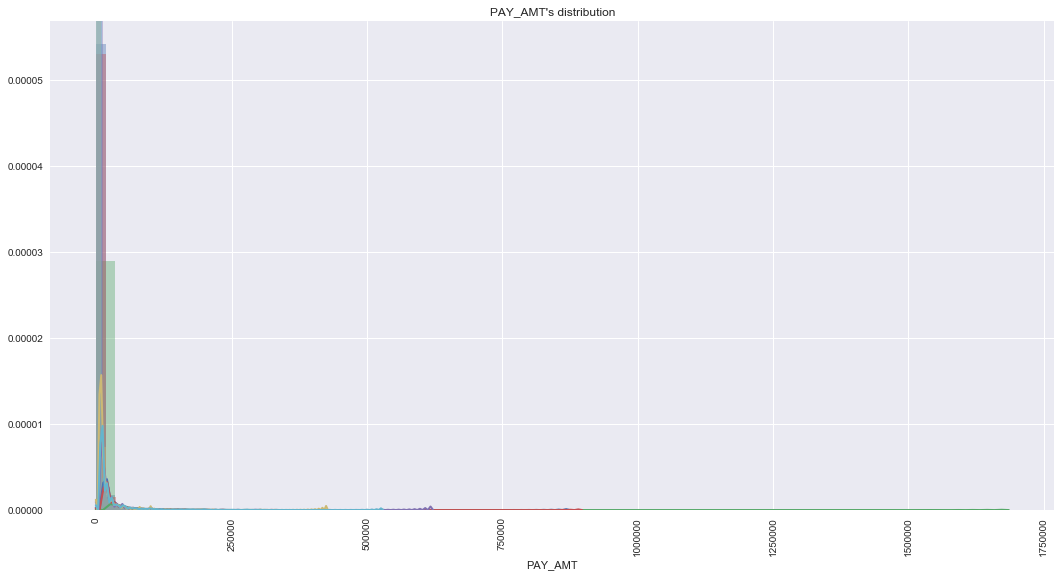

In [27]:
#最近付款金额可视化
plt.figure(figsize=(18, 9))
sns.set()
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth":2 } )
sdisplot_loan = sns.distplot(df['PAY_AMT1'] )
sdisplot_loan = sns.distplot(df['PAY_AMT2'] )
sdisplot_loan = sns.distplot(df['PAY_AMT3'] )
sdisplot_loan = sns.distplot(df['PAY_AMT4'] )
sdisplot_loan = sns.distplot(df['PAY_AMT5'] )
sdisplot_loan = sns.distplot(df['PAY_AMT6'] )
plt.xticks(rotation=90)
plt.xlabel('PAY_AMT')
plt.title('PAY_AMT\'s distribution')
sdisplot_loan.figure.savefig("PAY_AMT")

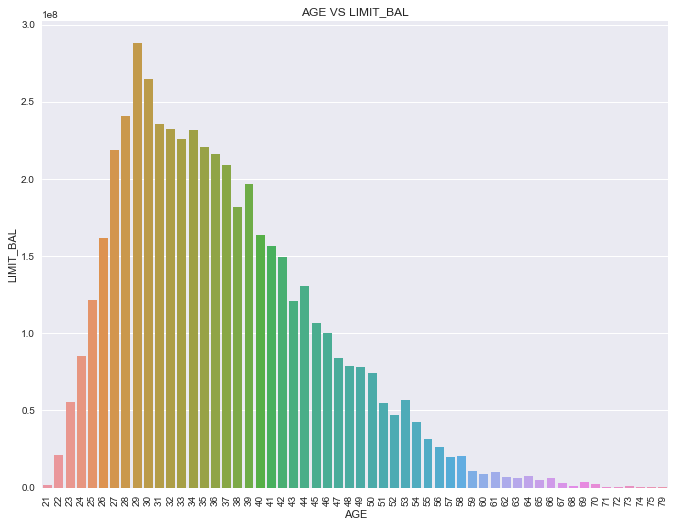

In [69]:
#贷款额度与年龄
data_group_by_state = df.groupby(['AGE'])['LIMIT_BAL'].sum() # 按年龄统计总授信额度
data_group_by_state_df= data_group_by_state.reset_index() # 将结果转为 dataframe
sns.set()
plt.figure(figsize=(10, 8))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 5})
sbarplot = sns.barplot(y='LIMIT_BAL' , x='AGE' , data=data_group_by_state_df )
plt.xlabel('AGE')
plt.ylabel('LIMIT_BAL')
plt.xticks(rotation=90)
plt.title('AGE VS LIMIT_BAL')
sbarplot.figure.savefig("AGE VS LIMIT_BAL")

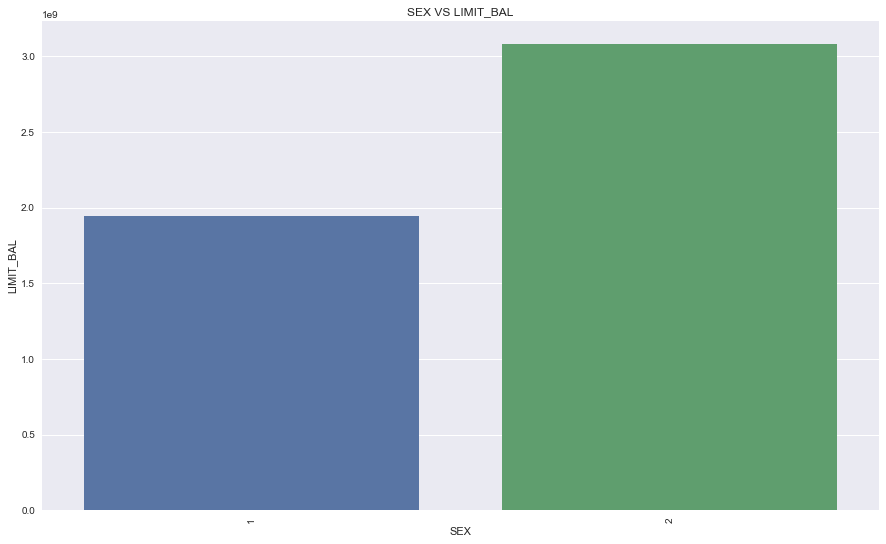

In [30]:
#贷款额度与性别
data_group_by_state = df.groupby(['SEX'])['LIMIT_BAL'].sum() # 按年龄统计总授信额度
data_group_by_state_df= data_group_by_state.reset_index() # 将结果转为 dataframe
sns.set()
plt.figure(figsize=(15, 9))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 5})
sbarplot = sns.barplot(y='LIMIT_BAL' , x='SEX' , data=data_group_by_state_df )
plt.xlabel('SEX')
plt.ylabel('LIMIT_BAL')
plt.xticks(rotation=90)
plt.title('SEX VS LIMIT_BAL')
sbarplot.figure.savefig("SEX VS LIMIT_BAL")

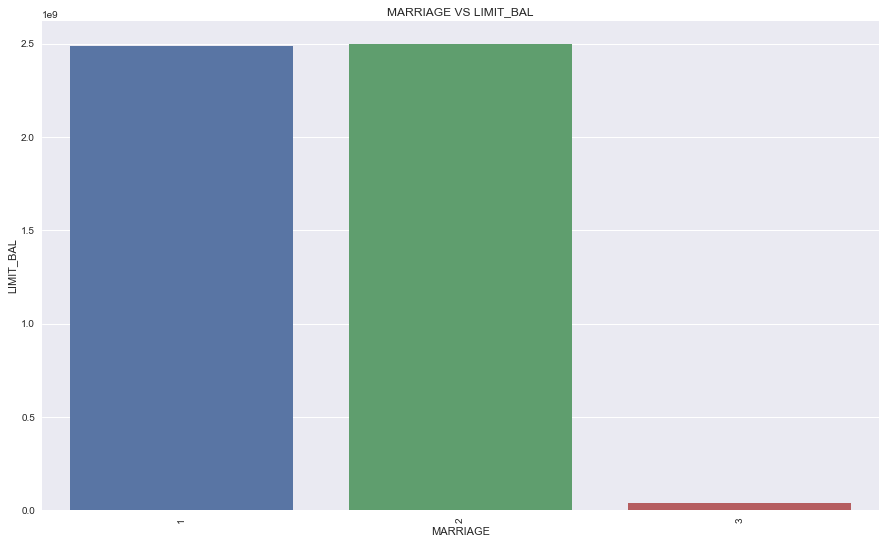

In [31]:
#贷款额度与婚姻状况
data_group_by_state = df.groupby(['MARRIAGE'])['LIMIT_BAL'].sum() # 按年龄统计总授信额度
data_group_by_state_df= data_group_by_state.reset_index() # 将结果转为 dataframe
sns.set()
plt.figure(figsize=(15, 9))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 5})
sbarplot = sns.barplot(y='LIMIT_BAL' , x='MARRIAGE' , data=data_group_by_state_df )
plt.xlabel('MARRIAGE')
plt.ylabel('LIMIT_BAL')
plt.xticks(rotation=90)
plt.title('MARRIAGE VS LIMIT_BAL')
sbarplot.figure.savefig("MARRIAGE VS LIMIT_BAL")

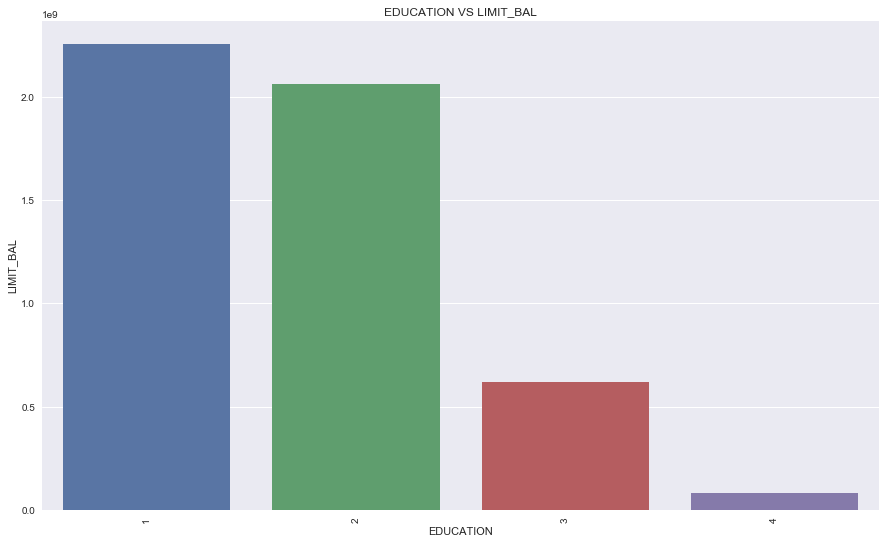

In [32]:
#贷款额度与教育程度
data_group_by_state = df.groupby(['EDUCATION'])['LIMIT_BAL'].sum() # 按年龄统计总授信额度
data_group_by_state_df= data_group_by_state.reset_index() # 将结果转为 dataframe
sns.set()
plt.figure(figsize=(15, 9))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 5})
sbarplot = sns.barplot(y='LIMIT_BAL' , x='EDUCATION' , data=data_group_by_state_df )
plt.xlabel('EDUCATION')
plt.ylabel('LIMIT_BAL')
plt.xticks(rotation=90)
plt.title('EDUCATION VS LIMIT_BAL')
sbarplot.figure.savefig("EDUCATION VS LIMIT_BAL")

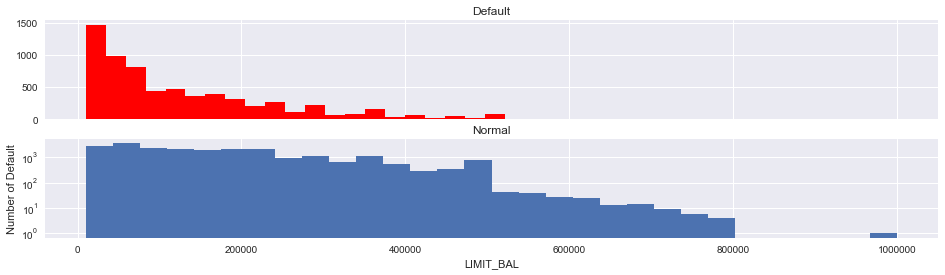

In [33]:
#违约状况、信用剩余额度和违约次数的关系
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4))

bins = 30

ax1.hist(df["LIMIT_BAL"][df["default payment next month"]== 1].dropna(), bins = bins, color='red')
ax1.set_title('Default')

ax2.hist(df["LIMIT_BAL"][df["default payment next month"] == 0].dropna(), bins = bins)
ax2.set_title('Normal')

plt.xlabel('LIMIT_BAL')
plt.ylabel('Number of Default')
plt.yscale('log')
plt.show()

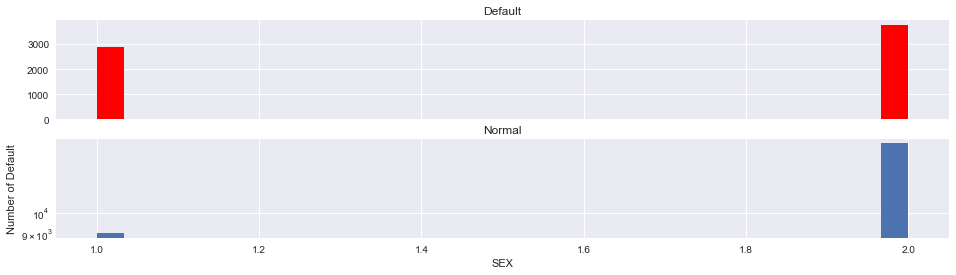

In [36]:
#违约状况、信用剩余额度和违约次数的关系
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4))

bins = 30

ax1.hist(df["SEX"][df["default payment next month"]== 1].dropna(), bins = bins, color='red')
ax1.set_title('Default')

ax2.hist(df["SEX"][df["default payment next month"] == 0].dropna(), bins = bins)
ax2.set_title('Normal')

plt.xlabel('SEX')
plt.ylabel('Number of Default')
plt.yscale('log')
plt.show()

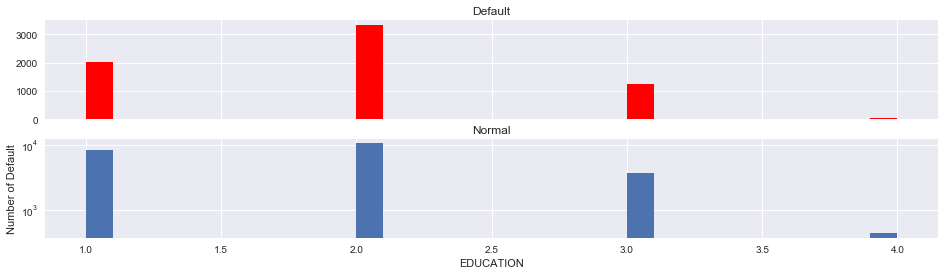

In [37]:
#违约状况、信用剩余额度和违约次数的关系
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4))

bins = 30

ax1.hist(df["EDUCATION"][df["default payment next month"]== 1].dropna(), bins = bins, color='red')
ax1.set_title('Default')

ax2.hist(df["EDUCATION"][df["default payment next month"] == 0].dropna(), bins = bins)
ax2.set_title('Normal')

plt.xlabel('EDUCATION')
plt.ylabel('Number of Default')
plt.yscale('log')
plt.show()

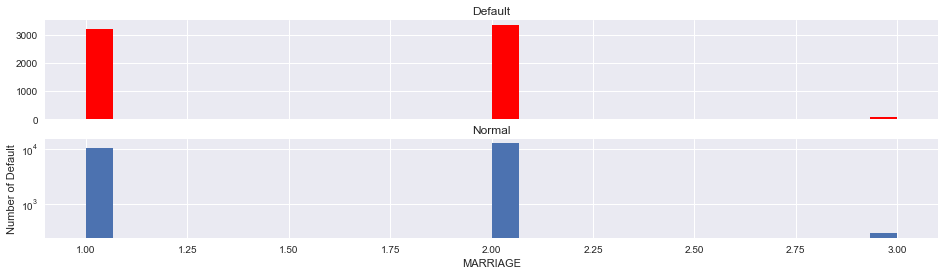

In [38]:
#违约状况、信用剩余额度和违约次数的关系
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4))

bins = 30

ax1.hist(df["MARRIAGE"][df["default payment next month"]== 1].dropna(), bins = bins, color='red')
ax1.set_title('Default')

ax2.hist(df["MARRIAGE"][df["default payment next month"] == 0].dropna(), bins = bins)
ax2.set_title('Normal')

plt.xlabel('MARRIAGE')
plt.ylabel('Number of Default')
plt.yscale('log')
plt.show()

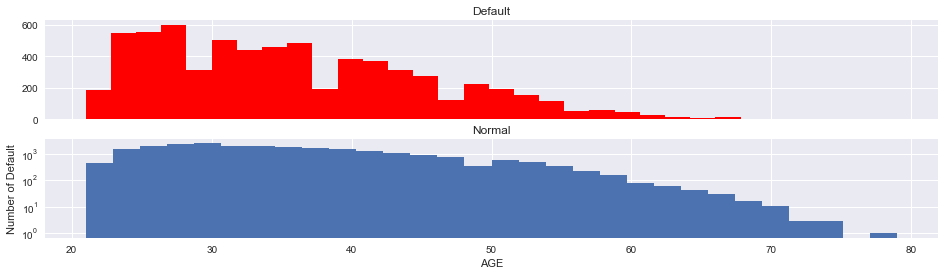

In [39]:
#违约状况、信用剩余额度和违约次数的关系
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4))

bins = 30

ax1.hist(df["AGE"][df["default payment next month"]== 1].dropna(), bins = bins, color='red')
ax1.set_title('Default')

ax2.hist(df["AGE"][df["default payment next month"] == 0].dropna(), bins = bins)
ax2.set_title('Normal')

plt.xlabel('AGE')
plt.ylabel('Number of Default')
plt.yscale('log')
plt.show()

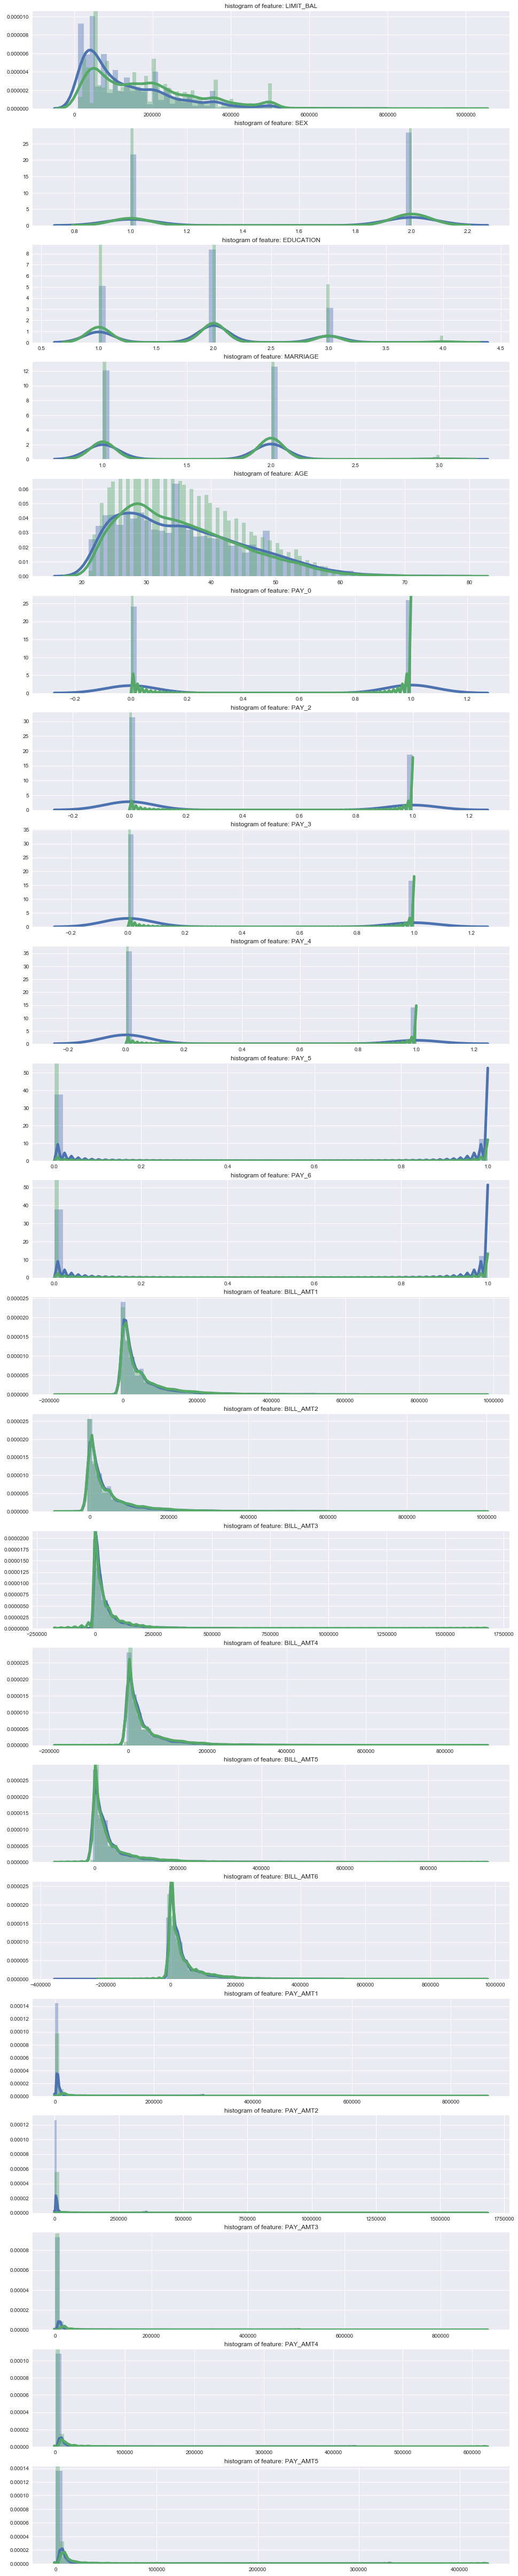

In [43]:
#Select only the anonymized features.
v_feat = df.ix[:,1:23].columns
plt.figure(figsize=(16,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_feat]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df["default payment next month"] == 1].dropna(), bins=50)
    sns.distplot(df[cn][df["default payment next month"] == 0].dropna(), bins=100)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))

In [44]:
test_size = 0.3
seed = 233
dtrain, dtest = model_selection.train_test_split(df, test_size=test_size, random_state=seed)
target = 'default payment next month'

predictors = [x for x in dtrain.columns if x not in [target, 'ID']]
x_train = dtrain[predictors]
y_train = dtrain[target]
x_test = dtest[predictors]
y_test = dtest[target]

In [45]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler # 导入模块
col = x_train.columns
# 对特征进行缩放
sc =StandardScaler() # 初始化缩放器
x_train =pd.DataFrame(sc.fit_transform(x_train), columns = col)#对数据进行标准化
x_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-0.6771,0.8127,0.2083,-1.0684,-0.0576,1.8516,2.4066,-0.4053,-0.3627,-0.3346,...,0.1720,0.1962,0.1930,0.1472,-0.3398,-0.1715,-0.1216,-0.1186,-0.1895,-0.1841
1,1.0222,0.8127,-1.1339,-1.0684,0.1583,-0.5401,-0.4155,-0.4053,-0.3627,-0.3346,...,-0.6712,-0.6670,-0.6494,-0.6432,-0.2589,-0.2310,-0.2679,-0.2447,-0.2740,-0.2567
2,-1.2179,-1.2305,0.2083,-1.0684,-1.3532,1.8516,2.4066,2.4673,2.7567,2.9889,...,-0.5679,-0.5338,-0.5306,-0.5264,-0.3403,-0.2733,-0.2307,-0.2985,-0.2907,-0.2711
3,-1.2179,-1.2305,0.2083,0.8494,-0.2736,-0.5401,-0.4155,-0.4053,-0.3627,-0.3346,...,-0.6844,-0.6718,-0.6640,-0.6556,-0.3403,-0.2733,-0.2851,-0.2985,-0.3243,-0.3001
4,0.0953,-1.2305,1.5505,0.8494,1.7778,-0.5401,-0.4155,-0.4053,-0.3627,-0.3346,...,0.4034,0.4333,0.4787,0.5303,-0.1447,-0.1185,-0.1159,-0.1420,-0.1436,-0.1397


In [46]:
names = x_train.columns
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=123)#构建分类随机森林分类器
clf.fit(x_train, y_train) #对自变量和因变量进行拟合
names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)

('LIMIT_BAL', 0.064827511345168523)
('SEX', 0.012890955960185876)
('EDUCATION', 0.021109789911443726)
('MARRIAGE', 0.014931440096057413)
('AGE', 0.071066678242947212)
('PAY_0', 0.068628326795517308)
('PAY_2', 0.056007141002200667)
('PAY_3', 0.0081059631932548712)
('PAY_4', 0.0072739715330326308)
('PAY_5', 0.020859118570807224)
('PAY_6', 0.01431572717905886)
('BILL_AMT1', 0.068986585735281408)
('BILL_AMT2', 0.056625828548482228)
('BILL_AMT3', 0.055619066322936242)
('BILL_AMT4', 0.056121180954478544)
('BILL_AMT5', 0.053446678988715635)
('BILL_AMT6', 0.05559246635802547)
('PAY_AMT1', 0.054949422367082557)
('PAY_AMT2', 0.051378814232588679)
('PAY_AMT3', 0.047334738219972146)
('PAY_AMT4', 0.043462946524783629)
('PAY_AMT5', 0.048260220920142628)
('PAY_AMT6', 0.048205426997836462)


(-1, 23)

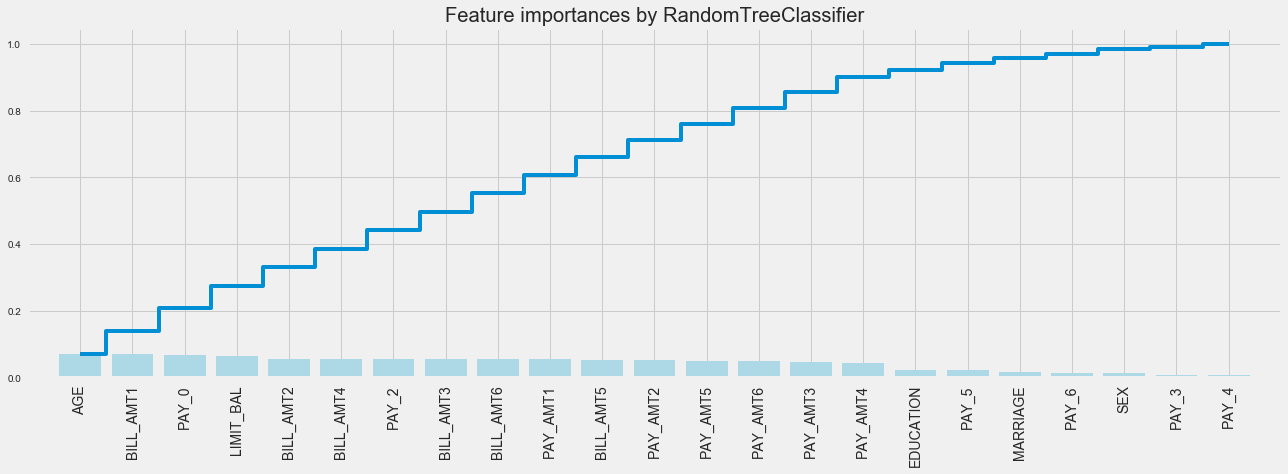

In [47]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## feature importances 可视化##
importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])

In [48]:
import sys
sys.path.append('C:\\Users\\FeiZhao\\Downloads') 
from dataquality_python import DataQuality
dq=DataQuality()

In [49]:
dq.F_AUC(x_train, y_train)

,AUC values,features
5,0.6873,PAY_0
6,0.6471,PAY_2
7,0.6228,PAY_3
8,0.6060,PAY_4
9,0.5978,PAY_5
10,0.5916,PAY_6
2,0.5275,EDUCATION
4,0.5060,AGE
16,0.5012,BILL_AMT6
15,0.4965,BILL_AMT5


In [51]:
dq.F_Spearman(x_train, y_train)

Must convert pd.Series to pd.DataFrame


,Spearman Correlation
0,"[LIMIT_BAL, -0.16797398125, 1.03067047345e-132]"
1,"[SEX, -0.0375452963591, 5.25600176726e-08]"
2,"[EDUCATION, 0.0429540215801, 4.7504944425e-10]"
3,"[MARRIAGE, -0.032102167223, 3.27190684024e-06]"
4,"[AGE, 0.00866973951483, 0.209002351526]"
5,"[PAY_0, 0.371848389436, 0.0]"
6,"[PAY_2, 0.344634857832, 0.0]"
7,"[PAY_3, 0.292986130294, 0.0]"
8,"[PAY_4, 0.274626870779, 0.0]"
9,"[PAY_5, 0.269944027897, 0.0]"


In [62]:
test_size = 0.3
seed = 233
dtrain, dtest = model_selection.train_test_split(df, test_size=test_size, random_state=seed)
target = 'default payment next month'

predictors = [x for x in dtrain.columns if x not in [target, 'id']]
x_train = dtrain[predictors]
y_train = dtrain[target]
x_test = dtest[predictors]
y_test = dtest[target]

In [63]:
#加载时间处理相关库
import datetime

#加载数据处理相关的库：Pandas 和 Numpy
import pandas as pd
import numpy as np
import time
import math


##加载模型相关的库
from sklearn import ensemble
from sklearn import linear_model
import lightgbm
from lightgbm.sklearn import LGBMClassifier
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.over_sampling import SMOTE, ADASYN

#加载评估相关的库
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#加载画图相关工具
import matplotlib.pyplot as plt

########################################################################################################################
estimator = lightgbm.LGBMClassifier(
        boosting_type='gbdt',
        #num_leaves=64,
        max_depth=7,
        learning_rate=0.01,
        n_estimators=1000,
        objective='binary',
        subsample=0.90000000000000002,
        colsample_bytree=0.80000000000000004,
        random_state=2017,
        is_unbalance='true')
        #scale_pos_weight=578)

estimator.fit(x_train,y_train)
y_pred_test=estimator.predict(x_test)
y_pred_train=estimator.predict(x_train)
y_score_test=estimator.predict_proba(x_test)
y_score_train=estimator.predict_proba(x_train)

print("测试集：-----------------------------------------------")
print("测试集正样本:",len(y_test[y_test == 1]))
print("测试集负样本:",len(y_test[y_test == 0]))
print("准确率:",metrics.accuracy_score(y_test,y_pred_test))
print("精确率：",metrics.precision_score(y_test,y_pred_test))
print("召回率：",metrics.recall_score(y_test,y_pred_test))
print("f1:",metrics.f1_score(y_test,y_pred_test))
print("矩阵",metrics.confusion_matrix(y_test,y_pred_test))
print("AUC",metrics.roc_auc_score(y_test,y_score_test[:,1]))

print("训练集：---------------------------------------------")
print("训练集正样本:",len(y_train[y_train == 1]))
print("训练集负样本:",len(y_train[y_train == 0]))
print("准确率:",metrics.accuracy_score(y_train,y_pred_train))
print("精确率：",metrics.precision_score(y_train,y_pred_train))
print("召回率：",metrics.recall_score(y_train,y_pred_train))
print("f1：",metrics.f1_score(y_train,y_pred_train))
print("矩阵",metrics.confusion_matrix(y_train,y_pred_train))
print("AUC",metrics.roc_auc_score(y_train,y_score_train[:,1]))

测试集：-----------------------------------------------
测试集正样本: 1988
测试集负样本: 7012
准确率: 0.760333333333
精确率： 0.467686424474
召回率： 0.615191146881
f1: 0.531392570063
矩阵 [[5620 1392]
 [ 765 1223]]
AUC 0.771614534612
训练集：---------------------------------------------
训练集正样本: 4648
训练集负样本: 16352
准确率: 0.817285714286
精确率： 0.565434887849
召回率： 0.753872633391
f1： 0.646196403873
矩阵 [[13659  2693]
 [ 1144  3504]]
AUC 0.886451185473


In [64]:
import simulated_annealing
from simulated_annealing.optimize import SimulatedAnneal
param_test1 = {'max_depth':range(1,12,2),
               'subsample':[i/100.0 for i in range(50,100)],
               'colsample_bytree':[i/100.0 for i in range(50,100)]}
estimator = lightgbm.LGBMClassifier(
        boosting_type='gbdt',
        #num_leaves=64,
        learning_rate=0.01,
        n_estimators=1000,
        objective='binary',
        random_state=2017,
        is_unbalance='true')
        #scale_pos_weight=578
# Initialize Simulated Annealing and fit
gsearch1 = SimulatedAnneal(estimator, param_test1, T=10.0, T_min=0.001, alpha=0.75,
                         verbose=True, max_iter=0.25, n_trans=5, max_runtime=300,
                         cv=3, scoring='f1_macro', refit=True)
gsearch1.fit(x_train.as_matrix(), y_train.as_matrix())
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_


INFO: Number of possible iterations given cooling schedule: 160



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.3s finished


2 T: 10.00000, score: 0.692, std: 0.006, params: {'max_depth': 5, 'subsample': 0.52000000000000002, 'colsample_bytree': 0.54000000000000004}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.3s finished


3 T: 10.00000, score: 0.692, std: 0.005, params: {'max_depth': 5, 'subsample': 0.52000000000000002, 'colsample_bytree': 0.72999999999999998}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.8s finished


4 T: 10.00000, score: 0.691, std: 0.005, params: {'max_depth': 7, 'subsample': 0.52000000000000002, 'colsample_bytree': 0.72999999999999998}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s finished


5 T: 10.00000, score: 0.691, std: 0.005, params: {'max_depth': 1, 'subsample': 0.52000000000000002, 'colsample_bytree': 0.72999999999999998}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished


6 T: 10.00000, score: 0.691, std: 0.004, params: {'max_depth': 1, 'subsample': 0.88, 'colsample_bytree': 0.72999999999999998}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s finished


7 T: 7.50000, score: 0.691, std: 0.004, params: {'max_depth': 1, 'subsample': 0.88, 'colsample_bytree': 0.79000000000000004}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.4s finished


8 T: 7.50000, score: 0.693, std: 0.004, params: {'max_depth': 5, 'subsample': 0.88, 'colsample_bytree': 0.79000000000000004}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.5s finished


9 T: 7.50000, score: 0.691, std: 0.005, params: {'max_depth': 7, 'subsample': 0.88, 'colsample_bytree': 0.79000000000000004}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.2s finished


10 T: 7.50000, score: 0.693, std: 0.004, params: {'max_depth': 7, 'subsample': 0.83999999999999997, 'colsample_bytree': 0.79000000000000004}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.6s finished


11 T: 7.50000, score: 0.693, std: 0.005, params: {'max_depth': 7, 'subsample': 0.89000000000000001, 'colsample_bytree': 0.79000000000000004}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.9s finished


12 T: 5.62500, score: 0.693, std: 0.005, params: {'max_depth': 7, 'subsample': 0.87, 'colsample_bytree': 0.79000000000000004}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.2s finished


13 T: 5.62500, score: 0.692, std: 0.005, params: {'max_depth': 5, 'subsample': 0.87, 'colsample_bytree': 0.79000000000000004}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.2s finished


14 T: 5.62500, score: 0.692, std: 0.004, params: {'max_depth': 5, 'subsample': 0.67000000000000004, 'colsample_bytree': 0.79000000000000004}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.6s finished


15 T: 5.62500, score: 0.693, std: 0.005, params: {'max_depth': 7, 'subsample': 0.67000000000000004, 'colsample_bytree': 0.79000000000000004}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.5s finished


16 T: 5.62500, score: 0.694, std: 0.006, params: {'max_depth': 11, 'subsample': 0.67000000000000004, 'colsample_bytree': 0.79000000000000004}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.0s finished


17 T: 4.21875, score: 0.693, std: 0.005, params: {'max_depth': 11, 'subsample': 0.67000000000000004, 'colsample_bytree': 0.81000000000000005}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.0s finished


18 T: 4.21875, score: 0.693, std: 0.004, params: {'max_depth': 11, 'subsample': 0.73999999999999999, 'colsample_bytree': 0.81000000000000005}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.5s finished


19 T: 4.21875, score: 0.694, std: 0.006, params: {'max_depth': 11, 'subsample': 0.85999999999999999, 'colsample_bytree': 0.81000000000000005}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s finished


20 T: 4.21875, score: 0.691, std: 0.004, params: {'max_depth': 1, 'subsample': 0.85999999999999999, 'colsample_bytree': 0.81000000000000005}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s finished


21 T: 4.21875, score: 0.691, std: 0.004, params: {'max_depth': 1, 'subsample': 0.85999999999999999, 'colsample_bytree': 0.88}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.1s finished


22 T: 3.16406, score: 0.693, std: 0.005, params: {'max_depth': 5, 'subsample': 0.85999999999999999, 'colsample_bytree': 0.88}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.9s finished


23 T: 3.16406, score: 0.692, std: 0.004, params: {'max_depth': 5, 'subsample': 0.65000000000000002, 'colsample_bytree': 0.88}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.9s finished


24 T: 3.16406, score: 0.691, std: 0.004, params: {'max_depth': 5, 'subsample': 0.56000000000000005, 'colsample_bytree': 0.88}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.5s finished


25 T: 3.16406, score: 0.693, std: 0.004, params: {'max_depth': 5, 'subsample': 0.88, 'colsample_bytree': 0.88}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.4s finished


26 T: 3.16406, score: 0.695, std: 0.005, params: {'max_depth': 11, 'subsample': 0.88, 'colsample_bytree': 0.88}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.1s finished


27 T: 2.37305, score: 0.695, std: 0.005, params: {'max_depth': 11, 'subsample': 0.88, 'colsample_bytree': 0.71999999999999997}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.4s finished


28 T: 2.37305, score: 0.689, std: 0.005, params: {'max_depth': 3, 'subsample': 0.88, 'colsample_bytree': 0.71999999999999997}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.8s finished


29 T: 2.37305, score: 0.692, std: 0.005, params: {'max_depth': 7, 'subsample': 0.88, 'colsample_bytree': 0.71999999999999997}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.7s finished


30 T: 2.37305, score: 0.693, std: 0.006, params: {'max_depth': 7, 'subsample': 0.88, 'colsample_bytree': 0.68000000000000005}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.9s finished


31 T: 2.37305, score: 0.692, std: 0.005, params: {'max_depth': 7, 'subsample': 0.88, 'colsample_bytree': 0.70999999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.0s finished


32 T: 1.77979, score: 0.695, std: 0.005, params: {'max_depth': 11, 'subsample': 0.88, 'colsample_bytree': 0.70999999999999996}
33 T: 1.77979, score: 0.692, std: 0.005, params: {'max_depth': 7, 'subsample': 0.88, 'colsample_bytree': 0.70999999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.8s finished


34 T: 1.77979, score: 0.693, std: 0.005, params: {'max_depth': 7, 'subsample': 0.53000000000000003, 'colsample_bytree': 0.70999999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s finished


35 T: 1.77979, score: 0.691, std: 0.005, params: {'max_depth': 1, 'subsample': 0.53000000000000003, 'colsample_bytree': 0.70999999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.3s finished


36 T: 1.77979, score: 0.693, std: 0.005, params: {'max_depth': 9, 'subsample': 0.53000000000000003, 'colsample_bytree': 0.70999999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.9s finished


37 T: 1.33484, score: 0.695, std: 0.005, params: {'max_depth': 9, 'subsample': 0.83999999999999997, 'colsample_bytree': 0.70999999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.8s finished


38 T: 1.33484, score: 0.693, std: 0.005, params: {'max_depth': 7, 'subsample': 0.83999999999999997, 'colsample_bytree': 0.70999999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.5s finished


39 T: 1.33484, score: 0.692, std: 0.004, params: {'max_depth': 7, 'subsample': 0.69999999999999996, 'colsample_bytree': 0.70999999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.8s finished


40 T: 1.33484, score: 0.691, std: 0.006, params: {'max_depth': 5, 'subsample': 0.69999999999999996, 'colsample_bytree': 0.70999999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.0s finished


41 T: 1.33484, score: 0.693, std: 0.005, params: {'max_depth': 5, 'subsample': 0.84999999999999998, 'colsample_bytree': 0.70999999999999996}


([(1,
   10.0,
   0.69068655882017771,
   0.0030037164331852919,
   {'colsample_bytree': 0.60999999999999999,
    'max_depth': 5,
    'subsample': 0.52000000000000002}),
  (2,
   10.0,
   0.69188890305828288,
   0.0059506357102922791,
   {'colsample_bytree': 0.54000000000000004,
    'max_depth': 5,
    'subsample': 0.52000000000000002}),
  (3,
   10.0,
   0.69186240379486996,
   0.0049758296455269559,
   {'colsample_bytree': 0.72999999999999998,
    'max_depth': 5,
    'subsample': 0.52000000000000002}),
  (4,
   10.0,
   0.69136681580088988,
   0.0051452863034980928,
   {'colsample_bytree': 0.72999999999999998,
    'max_depth': 7,
    'subsample': 0.52000000000000002}),
  (5,
   10.0,
   0.69058572102372173,
   0.004622048983655782,
   {'colsample_bytree': 0.72999999999999998,
    'max_depth': 1,
    'subsample': 0.52000000000000002}),
  (6,
   10.0,
   0.69086926264252779,
   0.0040908721017541743,
   {'colsample_bytree': 0.72999999999999998,
    'max_depth': 1,
    'subsample': 0.88

In [65]:
#加载时间处理相关库
import datetime

#加载数据处理相关的库：Pandas 和 Numpy
import pandas as pd
import numpy as np
import time
import math


##加载模型相关的库
from sklearn import ensemble
from sklearn import linear_model
import lightgbm
from lightgbm.sklearn import LGBMClassifier
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.over_sampling import SMOTE, ADASYN

#加载评估相关的库
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#加载画图相关工具
import matplotlib.pyplot as plt

########################################################################################################################
estimator = lightgbm.LGBMClassifier(
        boosting_type='gbdt',
        #num_leaves=64,
        max_depth=11,
        learning_rate=0.01,
        n_estimators=1000,
        objective='binary',
        subsample=0.88,
        colsample_bytree=0.88,
        random_state=2017,
        is_unbalance='true')
        #scale_pos_weight=578)

estimator.fit(x_train,y_train)
y_pred_test=estimator.predict(x_test)
y_pred_train=estimator.predict(x_train)
y_score_test=estimator.predict_proba(x_test)
y_score_train=estimator.predict_proba(x_train)

print("测试集：-----------------------------------------------")
print("测试集正样本:",len(y_test[y_test == 1]))
print("测试集负样本:",len(y_test[y_test == 0]))
print("准确率:",metrics.accuracy_score(y_test,y_pred_test))
print("精确率：",metrics.precision_score(y_test,y_pred_test))
print("召回率：",metrics.recall_score(y_test,y_pred_test))
print("f1:",metrics.f1_score(y_test,y_pred_test))
print("矩阵",metrics.confusion_matrix(y_test,y_pred_test))
print("AUC",metrics.roc_auc_score(y_test,y_score_test[:,1]))

print("训练集：---------------------------------------------")
print("训练集正样本:",len(y_train[y_train == 1]))
print("训练集负样本:",len(y_train[y_train == 0]))
print("准确率:",metrics.accuracy_score(y_train,y_pred_train))
print("精确率：",metrics.precision_score(y_train,y_pred_train))
print("召回率：",metrics.recall_score(y_train,y_pred_train))
print("f1：",metrics.f1_score(y_train,y_pred_train))
print("矩阵",metrics.confusion_matrix(y_train,y_pred_train))
print("AUC",metrics.roc_auc_score(y_train,y_score_train[:,1]))

测试集：-----------------------------------------------
测试集正样本: 1988
测试集负样本: 7012
准确率: 0.762333333333
精确率： 0.470747772181
召回率： 0.611167002012
f1: 0.531845042679
矩阵 [[5646 1366]
 [ 773 1215]]
AUC 0.772035485876
训练集：---------------------------------------------
训练集正样本: 4648
训练集负样本: 16352
准确率: 0.821571428571
精确率： 0.572091534646
召回率： 0.769148020654
f1： 0.656143892815
矩阵 [[13678  2674]
 [ 1073  3575]]
AUC 0.895077667919


In [66]:
import simulated_annealing
from simulated_annealing.optimize import SimulatedAnneal
param_test1 = {'max_depth':range(5,12,2),
               'subsample':[i/1000.0 for i in range(500,1000)],
               'colsample_bytree':[i/1000.0 for i in range(500,1000)]}
estimator = lightgbm.LGBMClassifier(
        boosting_type='gbdt',
        #num_leaves=64,
        learning_rate=0.01,
        n_estimators=1000,
        objective='binary',
        random_state=2017,
        is_unbalance='true')
        #scale_pos_weight=578
# Initialize Simulated Annealing and fit
gsearch1 = SimulatedAnneal(estimator, param_test1, T=10.0, T_min=0.001, alpha=0.75,
                         verbose=True, max_iter=0.25, n_trans=5, max_runtime=300,
                         cv=3, scoring='f1_macro', refit=True)
gsearch1.fit(x_train.as_matrix(), y_train.as_matrix())
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_


INFO: Number of possible iterations given cooling schedule: 160



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.8s finished


2 T: 10.00000, score: 0.693, std: 0.005, params: {'max_depth': 7, 'subsample': 0.95199999999999996, 'colsample_bytree': 0.63500000000000001}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.4s finished


3 T: 10.00000, score: 0.693, std: 0.005, params: {'max_depth': 7, 'subsample': 0.95199999999999996, 'colsample_bytree': 0.55100000000000005}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.0s finished


4 T: 10.00000, score: 0.695, std: 0.005, params: {'max_depth': 7, 'subsample': 0.95199999999999996, 'colsample_bytree': 0.83099999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.1s finished


5 T: 10.00000, score: 0.695, std: 0.005, params: {'max_depth': 7, 'subsample': 0.95199999999999996, 'colsample_bytree': 0.82699999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.3s finished


6 T: 10.00000, score: 0.693, std: 0.004, params: {'max_depth': 7, 'subsample': 0.95199999999999996, 'colsample_bytree': 0.60399999999999998}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.8s finished


7 T: 7.50000, score: 0.694, std: 0.004, params: {'max_depth': 7, 'subsample': 0.69199999999999995, 'colsample_bytree': 0.60399999999999998}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.1s finished


8 T: 7.50000, score: 0.694, std: 0.005, params: {'max_depth': 7, 'subsample': 0.69199999999999995, 'colsample_bytree': 0.58099999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.2s finished


9 T: 7.50000, score: 0.693, std: 0.006, params: {'max_depth': 7, 'subsample': 0.82399999999999995, 'colsample_bytree': 0.58099999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.4s finished


10 T: 7.50000, score: 0.695, std: 0.006, params: {'max_depth': 9, 'subsample': 0.82399999999999995, 'colsample_bytree': 0.58099999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.3s finished


11 T: 7.50000, score: 0.693, std: 0.006, params: {'max_depth': 11, 'subsample': 0.82399999999999995, 'colsample_bytree': 0.58099999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.2s finished


12 T: 5.62500, score: 0.696, std: 0.005, params: {'max_depth': 11, 'subsample': 0.89200000000000002, 'colsample_bytree': 0.58099999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.3s finished


13 T: 5.62500, score: 0.695, std: 0.005, params: {'max_depth': 9, 'subsample': 0.89200000000000002, 'colsample_bytree': 0.58099999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.3s finished


14 T: 5.62500, score: 0.694, std: 0.006, params: {'max_depth': 9, 'subsample': 0.89200000000000002, 'colsample_bytree': 0.72899999999999998}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.6s finished


15 T: 5.62500, score: 0.695, std: 0.005, params: {'max_depth': 9, 'subsample': 0.89200000000000002, 'colsample_bytree': 0.58199999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.5s finished


16 T: 5.62500, score: 0.694, std: 0.005, params: {'max_depth': 9, 'subsample': 0.89200000000000002, 'colsample_bytree': 0.89600000000000002}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.3s finished


17 T: 4.21875, score: 0.695, std: 0.004, params: {'max_depth': 9, 'subsample': 0.89200000000000002, 'colsample_bytree': 0.83499999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.8s finished


18 T: 4.21875, score: 0.693, std: 0.004, params: {'max_depth': 5, 'subsample': 0.89200000000000002, 'colsample_bytree': 0.83499999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.5s finished


19 T: 4.21875, score: 0.694, std: 0.004, params: {'max_depth': 7, 'subsample': 0.89200000000000002, 'colsample_bytree': 0.83499999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.2s finished


20 T: 4.21875, score: 0.691, std: 0.005, params: {'max_depth': 7, 'subsample': 0.52300000000000002, 'colsample_bytree': 0.83499999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.5s finished


21 T: 4.21875, score: 0.695, std: 0.005, params: {'max_depth': 7, 'subsample': 0.88800000000000001, 'colsample_bytree': 0.83499999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.7s finished


22 T: 3.16406, score: 0.695, std: 0.005, params: {'max_depth': 9, 'subsample': 0.88800000000000001, 'colsample_bytree': 0.83499999999999996}
23 T: 3.16406, score: 0.695, std: 0.005, params: {'max_depth': 7, 'subsample': 0.88800000000000001, 'colsample_bytree': 0.83499999999999996}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.6s finished


24 T: 3.16406, score: 0.693, std: 0.006, params: {'max_depth': 7, 'subsample': 0.88800000000000001, 'colsample_bytree': 0.58899999999999997}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.2s finished


25 T: 3.16406, score: 0.695, std: 0.005, params: {'max_depth': 7, 'subsample': 0.88800000000000001, 'colsample_bytree': 0.879}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.7s finished


26 T: 3.16406, score: 0.693, std: 0.005, params: {'max_depth': 7, 'subsample': 0.70899999999999996, 'colsample_bytree': 0.879}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.0s finished


27 T: 2.37305, score: 0.693, std: 0.005, params: {'max_depth': 11, 'subsample': 0.70899999999999996, 'colsample_bytree': 0.879}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.7s finished


28 T: 2.37305, score: 0.693, std: 0.005, params: {'max_depth': 11, 'subsample': 0.70899999999999996, 'colsample_bytree': 0.752}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.0s finished


29 T: 2.37305, score: 0.693, std: 0.005, params: {'max_depth': 11, 'subsample': 0.70899999999999996, 'colsample_bytree': 0.78900000000000003}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.5s finished


30 T: 2.37305, score: 0.694, std: 0.005, params: {'max_depth': 11, 'subsample': 0.59599999999999997, 'colsample_bytree': 0.78900000000000003}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.6s finished


31 T: 2.37305, score: 0.691, std: 0.004, params: {'max_depth': 5, 'subsample': 0.59599999999999997, 'colsample_bytree': 0.78900000000000003}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.8s finished


32 T: 1.77979, score: 0.691, std: 0.006, params: {'max_depth': 5, 'subsample': 0.52100000000000002, 'colsample_bytree': 0.78900000000000003}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.7s finished


33 T: 1.77979, score: 0.690, std: 0.005, params: {'max_depth': 9, 'subsample': 0.52100000000000002, 'colsample_bytree': 0.78900000000000003}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.8s finished


34 T: 1.77979, score: 0.694, std: 0.004, params: {'max_depth': 9, 'subsample': 0.79900000000000004, 'colsample_bytree': 0.78900000000000003}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.5s finished


35 T: 1.77979, score: 0.692, std: 0.006, params: {'max_depth': 9, 'subsample': 0.55200000000000005, 'colsample_bytree': 0.78900000000000003}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.0s finished


36 T: 1.77979, score: 0.692, std: 0.004, params: {'max_depth': 11, 'subsample': 0.55200000000000005, 'colsample_bytree': 0.78900000000000003}


([(1,
   10.0,
   0.69164103696272095,
   0.004208051653600494,
   {'colsample_bytree': 0.63500000000000001,
    'max_depth': 5,
    'subsample': 0.95199999999999996}),
  (2,
   10.0,
   0.69307901289457374,
   0.0045678174195320047,
   {'colsample_bytree': 0.63500000000000001,
    'max_depth': 7,
    'subsample': 0.95199999999999996}),
  (3,
   10.0,
   0.69297634218597837,
   0.0050872456910815052,
   {'colsample_bytree': 0.55100000000000005,
    'max_depth': 7,
    'subsample': 0.95199999999999996}),
  (4,
   10.0,
   0.69468568825402544,
   0.005291013474832575,
   {'colsample_bytree': 0.83099999999999996,
    'max_depth': 7,
    'subsample': 0.95199999999999996}),
  (5,
   10.0,
   0.69468568825402544,
   0.005291013474832575,
   {'colsample_bytree': 0.82699999999999996,
    'max_depth': 7,
    'subsample': 0.95199999999999996}),
  (6,
   10.0,
   0.69255517053005866,
   0.0044319087696536386,
   {'colsample_bytree': 0.60399999999999998,
    'max_depth': 7,
    'subsample': 0.9519